In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [117]:
df = pd.read_csv('data penumpang.csv',index_col=1)
df2 = pd.read_csv('Data-Penumpang-Bus-Sekolah-Juli-2017.csv')
df3 = pd.read_csv('Jumlah-Armada-Bus-Sekolah1.csv')

In [118]:
df.info()
#df.isnull()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, ZONA 1 to RUTE 19
Data columns (total 26 columns):
type_operasi    31 non-null object
area_operasi    31 non-null object
b1              31 non-null int64
p1              31 non-null int64
b2              31 non-null int64
p2              31 non-null int64
b3              31 non-null int64
p3              31 non-null int64
b4              31 non-null int64
p4              31 non-null int64
b5              31 non-null int64
p5              31 non-null int64
b6              31 non-null int64
p6              31 non-null int64
b7              31 non-null int64
p7              31 non-null int64
b8              31 non-null int64
p8              31 non-null int64
b9              31 non-null int64
p9              31 non-null int64
b10             31 non-null int64
p10             31 non-null int64
b11             31 non-null int64
p11             31 non-null int64
b12             31 non-null int64
p12             31 non-null int64
dtypes

In [119]:
df.head()

,type_operasi,area_operasi,b1,p1,b2,p2,b3,p3,b4,p4,...,b8,p8,b9,p9,b10,p10,b11,p11,b12,p12
daerah_operasi,,,,,,,,,,,,,,,,,,,,,
ZONA 1,ZONASI,ZONASI PONDOK GEDE - HALIM- CONDET - RANCHO,100,20358,109,20696,127,232,99,11367,...,94,14823,105,1767,88,14626,126,22839,77,9612
ZONA 2,ZONASI,ZONASI KP.MELAYU - RAWAMANGUN,84,16302,93,16478,107,16294,80,10494,...,75,10608,87,13361,73,10897,98,16596,63,7512
ZONA 3,ZONASI,ZONASI TERMINAL KALIDERES - KAMAL,67,11416,74,12427,86,14484,67,8382,...,62,592,74,6963,59,559,88,8227,50,3737
ZONA 4,ZONASI,ZONASI KALIDERES -SEMANAN-DURIKOSAMBI,102,18655,113,20987,128,23236,99,1337,...,93,11074,107,12334,83,934,123,14482,67,6682
ZONA 5,ZONASI,ZONASI PULO GADUNG-MARDANI-PASEBAN,68,12332,74,12846,87,15159,70,7735,...,62,6919,73,9328,57,686,82,11056,50,5078


In [120]:
df2['bus'] = df2['jumlah_bus']/df2['jumlah_bus'].sum()*100
df2['penumpang'] = df2['jumlah_penumpang']/df2['jumlah_penumpang'].sum()*100

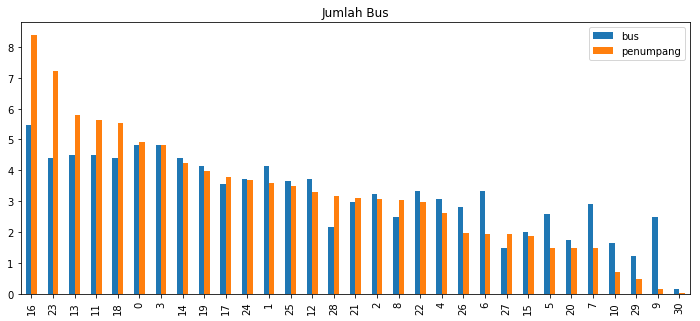

In [121]:
df2[['bus','penumpang']].sort_values(by=['penumpang'], ascending= False).plot.bar(title ='Jumlah Bus', figsize = (12,5))
plt.show()

In [ ]:
df['bus'] = df['jumlah_bus']/df['jumlah_bus'].sum()*100
df2['penumpang'] = df2['jumlah_penumpang']/df2['jumlah_penumpang'].sum()*100

In [ ]:
df2[['bus','penumpang']].sort_values(by=['penumpang'], ascending= False).plot.bar(title ='Jumlah Bus', figsize = (12,5))
plt.show()

### Regresi jumlah penumpang vs jumlah bus

In [95]:
lm2 = smf.ols(formula="b7~p7", data=df).fit()

In [99]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     b7   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     89.42
Date:                Sun, 03 Jun 2018   Prob (F-statistic):           2.31e-10
Time:                        22:57:10   Log-Likelihood:                -105.25
No. Observations:                  31   AIC:                             214.5
Df Residuals:                      29   BIC:                             217.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8207      2.595      6.867      0.000      12.513      23.129
p7             0.0027      0.000      9.456      0.000       0.002       0.003
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.825
Skew:                          -0.480   Prob(JB):                        0.402
Kurtosis:                       2.300   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
lm = smf.ols(formula="jumlah_bus~jumlah_penumpang", data=df2).fit()

In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     b7   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     89.42
Date:                Sun, 03 Jun 2018   Prob (F-statistic):           2.31e-10
Time:                        22:56:09   Log-Likelihood:                -105.25
No. Observations:                  31   AIC:                             214.5
Df Residuals:                      29   BIC:                             217.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8207      2.595      6.867      0.000      12.513      23.129
p7             0.0027      0.000      9.456      0.000       0.002       0.003
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.825
Skew:                          -0.480   Prob(JB):                        0.402
Kurtosis:                       2.300   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
sns.barplot(x='daerah_operasi',y='jumlah_bus',data=df,orient='h')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [67]:
df.plot(df, "jumlah_bus", kind="barh", color=sns.color_palette("deep", 3))

SyntaxError: keyword can't be an expression (<ipython-input-67-80fe3a60cbfe>, line 1)

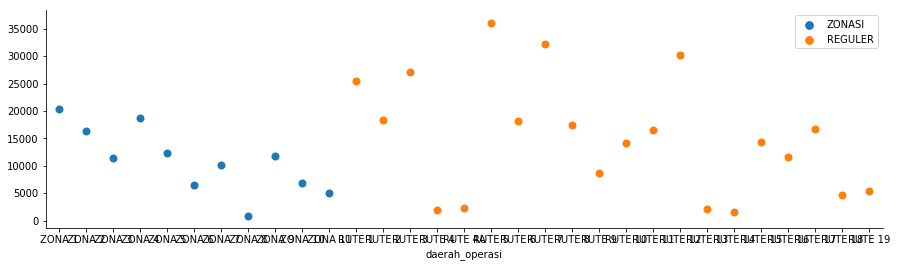

In [38]:
plt.subplots(figsize=(15,4))
sns.stripplot(x='daerah_operasi',y='p1', data=df, size=8,hue='type_operasi')#jitter untuk mecah garis
plt.ylabel('')
plt.legend(bbox_to_anchor=(1,1)) #legend outside box
#plt.title('Tip Distribution')
sns.despine()
plt.show()

In [58]:
df.describe()

,b1,p1,b2,p2,b3,p3,b4,p4,b5,p5,...,b8,p8,b9,p9,b10,p10,b11,p11,b12,p12
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,72.967742,13710.225806,82.064516,16410.838710,94.225806,16756.741935,71.387097,10504.225806,65.967742,8548.258065,...,67.967742,9513.967742,79.966667,12536.733333,64.310345,9690.655172,93.896552,15145.724138,55.241379,7129.724138
std,23.766200,9451.969734,27.535354,10049.503706,31.401390,11714.918281,24.408574,6950.672350,31.675947,5018.749698,...,22.222337,6511.401014,34.225906,9425.491001,20.269794,6963.958025,31.079788,10083.362336,17.126953,4521.224178
min,34.000000,751.000000,36.000000,534.000000,39.000000,232.000000,33.000000,694.000000,21.000000,896.000000,...,31.000000,592.000000,8.000000,939.000000,30.000000,559.000000,42.000000,382.000000,24.000000,105.000000
25%,57.000000,5875.500000,65.000000,9706.500000,74.500000,8089.000000,51.000000,5223.000000,41.500000,4858.000000,...,49.500000,4914.500000,57.500000,6306.000000,47.000000,4766.000000,67.000000,7945.000000,40.000000,3908.000000
50%,68.000000,12332.000000,76.000000,15869.000000,88.000000,15159.000000,67.000000,10015.000000,60.000000,7687.000000,...,64.000000,9706.000000,77.000000,12365.000000,60.000000,10502.000000,86.000000,14482.000000,52.000000,7447.000000
75%,89.500000,18263.000000,97.500000,20794.000000,110.000000,23133.500000,87.500000,13728.500000,87.000000,11569.000000,...,84.500000,12944.000000,104.750000,15212.500000,83.000000,13558.000000,119.000000,22487.000000,68.000000,8958.000000
max,128.000000,36009.000000,152.000000,38934.000000,175.000000,42338.000000,137.000000,29121.000000,131.000000,23105.000000,...,124.000000,24274.000000,152.000000,34904.000000,113.000000,23346.000000,174.000000,38215.000000,99.000000,17901.000000


In [141]:
df['rata2_bus'] = df['b1']+df['b2']+df['b3']+df['b4']+df['b5']+df['b6']+df['b7']+df['b8']+df['b9']+df['b10']+df['b11']+df['b12']/12
df['rata2_pen'] = df['p1']+df['p2']+df['p3']+df['p4']+df['p5']+df['p6']+df['p7']+df['p8']+df['p9']+df['p10']+df['p11']+df['p12']/12
df['kepadatan'] = round(df['rata2_pen']*25/df['rata2_bus'])

In [142]:
df.head()

,type_operasi,area_operasi,b1,p1,b2,p2,b3,p3,b4,p4,...,p10,b11,p11,b12,p12,rata2_bus,rata2_pen,kepadatan,rata_bus,penumpang
daerah_operasi,,,,,,,,,,,,,,,,,,,,,
ZONA 1,ZONASI,ZONASI PONDOK GEDE - HALIM- CONDET - RANCHO,100,20358,109,20696,127,232,99,11367,...,14626,126,22839,77,9612,1085.416667,132329.000000,3048.0,4.521502,3.440263
ZONA 2,ZONASI,ZONASI KP.MELAYU - RAWAMANGUN,84,16302,93,16478,107,16294,80,10494,...,10897,98,16596,63,7512,886.250000,132174.000000,3728.0,3.691837,3.436233
ZONA 3,ZONASI,ZONASI TERMINAL KALIDERES - KAMAL,67,11416,74,12427,86,14484,67,8382,...,559,88,8227,50,3737,711.166667,78715.416667,2767.0,2.962495,2.046428
ZONA 4,ZONASI,ZONASI KALIDERES -SEMANAN-DURIKOSAMBI,102,18655,113,20987,128,23236,99,1337,...,934,123,14482,67,6682,1052.583333,129042.833333,3065.0,4.384729,3.354830
ZONA 5,ZONASI,ZONASI PULO GADUNG-MARDANI-PASEBAN,68,12332,74,12846,87,15159,70,7735,...,686,82,11056,50,5078,706.166667,90440.166667,3202.0,2.941667,2.351245


In [147]:
df['rata_bus'] = df['rata2_bus']/df['rata2_bus'].sum()*100
df['penumpang'] = df['rata2_pen']/df['rata2_pen'].sum()*100
df['per_kepadatan'] = df['kepadatan']/df['kepadatan'].sum()*100

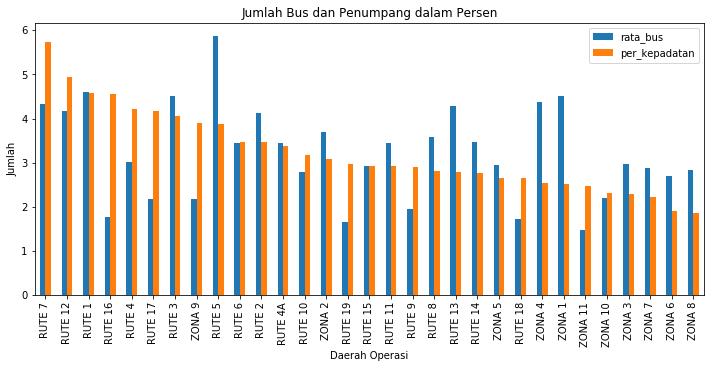

In [150]:
df[['rata_bus','per_kepadatan']].sort_values(by=['per_kepadatan'],ascending= False).plot.bar(title ='Jumlah Bus dan Penumpang dalam Persen', figsize = (12,5))
plt.ylabel('Jumlah')
plt.xlabel('Daerah Operasi')
plt.show()

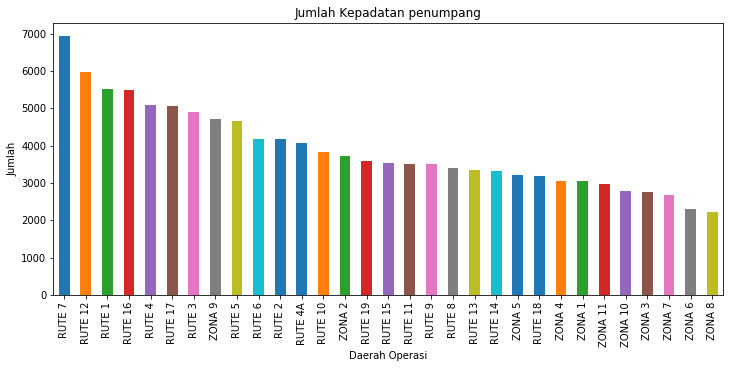

In [144]:
df['kepadatan'].sort_values(ascending= False).plot.bar(title ='Jumlah Kepadatan penumpang', figsize = (12,5))
plt.ylabel('Jumlah')
plt.xlabel('Daerah Operasi')
plt.show()

In [149]:
df.head()

,type_operasi,area_operasi,b1,p1,b2,p2,b3,p3,b4,p4,...,b11,p11,b12,p12,rata2_bus,rata2_pen,kepadatan,rata_bus,penumpang,per_kepadatan
daerah_operasi,,,,,,,,,,,,,,,,,,,,,
ZONA 1,ZONASI,ZONASI PONDOK GEDE - HALIM- CONDET - RANCHO,100,20358,109,20696,127,232,99,11367,...,126,22839,77,9612,1085.416667,132329.000000,3048.0,4.521502,3.440263,2.522866
ZONA 2,ZONASI,ZONASI KP.MELAYU - RAWAMANGUN,84,16302,93,16478,107,16294,80,10494,...,98,16596,63,7512,886.250000,132174.000000,3728.0,3.691837,3.436233,3.085710
ZONA 3,ZONASI,ZONASI TERMINAL KALIDERES - KAMAL,67,11416,74,12427,86,14484,67,8382,...,88,8227,50,3737,711.166667,78715.416667,2767.0,2.962495,2.046428,2.290279
ZONA 4,ZONASI,ZONASI KALIDERES -SEMANAN-DURIKOSAMBI,102,18655,113,20987,128,23236,99,1337,...,123,14482,67,6682,1052.583333,129042.833333,3065.0,4.384729,3.354830,2.536937
ZONA 5,ZONASI,ZONASI PULO GADUNG-MARDANI-PASEBAN,68,12332,74,12846,87,15159,70,7735,...,82,11056,50,5078,706.166667,90440.166667,3202.0,2.941667,2.351245,2.650333


In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
jenis_armada           71 non-null object
merk                   71 non-null object
tahun_pengadaan        71 non-null int64
wilayah_operasi        71 non-null object
nomor_plat             71 non-null object
kondisi                71 non-null object
kapasitas_penumpang    71 non-null object
kode_trayek            71 non-null object
dtypes: int64(1), object(7)
memory usage: 4.5+ KB


In [100]:
df.describe()

,b1,p1,b2,p2,b3,p3,b4,p4,b5,p5,...,b8,p8,b9,p9,b10,p10,b11,p11,b12,p12
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,72.967742,13710.225806,82.064516,16410.838710,94.225806,16756.741935,71.387097,10504.225806,65.967742,8548.258065,...,67.967742,9513.967742,79.967742,12536.741935,64.354839,9690.677419,93.903226,15145.741935,55.225806,7129.741935
std,23.766200,9451.969734,27.535354,10049.503706,31.401390,11714.918281,24.408574,6950.672350,31.675947,5018.749698,...,22.222337,6511.401014,33.650640,9267.068105,19.583238,6727.822626,30.025939,9741.453499,16.546318,4367.917528
min,34.000000,751.000000,36.000000,534.000000,39.000000,232.000000,33.000000,694.000000,21.000000,896.000000,...,31.000000,592.000000,8.000000,939.000000,30.000000,559.000000,42.000000,382.000000,24.000000,105.000000
25%,57.000000,5875.500000,65.000000,9706.500000,74.500000,8089.000000,51.000000,5223.000000,41.500000,4858.000000,...,49.500000,4914.500000,59.000000,6449.000000,48.000000,4903.500000,70.000000,8049.000000,44.000000,3985.000000
50%,68.000000,12332.000000,76.000000,15869.000000,88.000000,15159.000000,67.000000,10015.000000,60.000000,7687.000000,...,64.000000,9706.000000,79.000000,12396.000000,64.000000,9849.000000,88.000000,15146.000000,53.000000,7130.000000
75%,89.500000,18263.000000,97.500000,20794.000000,110.000000,23133.500000,87.500000,13728.500000,87.000000,11569.000000,...,84.500000,12944.000000,104.500000,15024.000000,83.000000,12972.000000,119.000000,20999.000000,67.500000,8624.500000
max,128.000000,36009.000000,152.000000,38934.000000,175.000000,42338.000000,137.000000,29121.000000,131.000000,23105.000000,...,124.000000,24274.000000,152.000000,34904.000000,113.000000,23346.000000,174.000000,38215.000000,99.000000,17901.000000
